In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
img_gato = plt.imread("Data/catto.png")
img_castillo = plt.imread("Data/Noisy_Smithsonian_Castle.jpg")

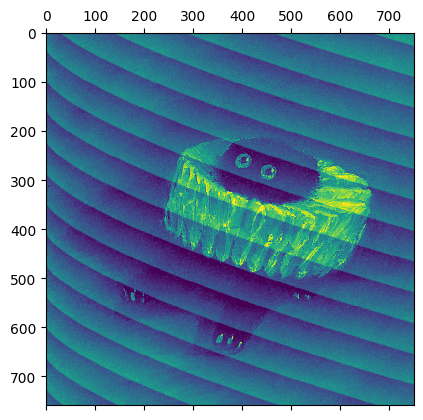

In [20]:
plt.matshow(img_gato)

In [5]:
altura_g,ancho_g = img_gato.shape
altura_g,ancho_g

(759, 750)

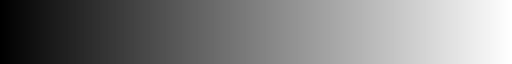

In [6]:
cmap = plt.get_cmap("grey")
cmap.set_bad((1,0,0))
cmap

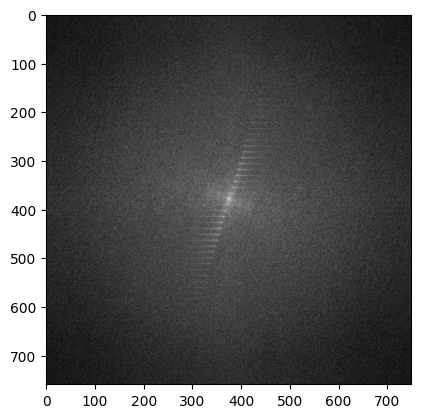

In [7]:
transformada_ima_gato = np.fft.fft2(img_gato)

transformada_movida_gato = np.fft.fftshift(transformada_ima_gato)

magnitud_transformada_movida_gato = np.abs(transformada_movida_gato)

magnitud_logaritmo_gato = np.log1p(magnitud_transformada_movida_gato)
plt.imshow(magnitud_logaritmo_gato,cmap=cmap)

In [94]:
def filtrar(altura,ancho, magnitud,transformada,tolerancia):

    r= 15

    centro_y = altura// 2
    centro_x = ancho // 2

    indices_puntos_brillantes = np.argwhere(magnitud > (np.max(magnitud)*tolerancia))

    indices_sin_centro = []

    for (h,a) in indices_puntos_brillantes:

        if not (((centro_y-r) < h < (centro_y+r)) and ((centro_x-r) < a < (centro_x+r))):

            indices_sin_centro.append((h,a))

    copia_transformada = transformada.copy()

    for (h,a) in indices_sin_centro:

        copia_transformada[h-5:h+5,a-5:a+5] = 0

    magnitud_copia = np.abs(copia_transformada)

    magnitud_log = np.log1p(magnitud_copia)

    return magnitud_log,copia_transformada

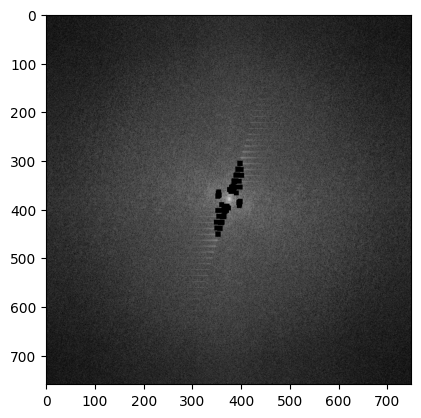

In [95]:
magnitud_log_g,copia_transformada_g = filtrar(altura_g, ancho_g,magnitud_logaritmo_gato, transformada_movida_gato,0.55)

plt.imshow(magnitud_log_g,cmap = cmap)

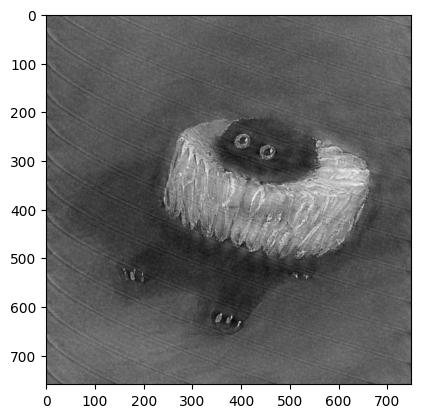

In [96]:
reorganizacion_imagen_gato= np.fft.ifftshift(copia_transformada_g)
imagen_gato_final = np.fft.ifft2(reorganizacion_imagen_gato).real

plt.imshow(imagen_gato_final,cmap = cmap)

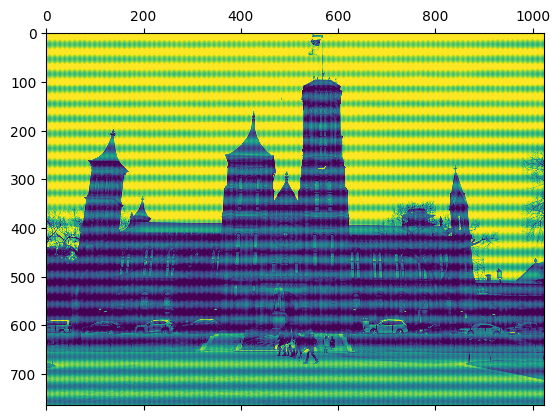

In [73]:
plt.matshow(img_castillo)

In [27]:
altura_c,ancho_c = img_castillo.shape
altura_c,ancho_c

(765, 1024)

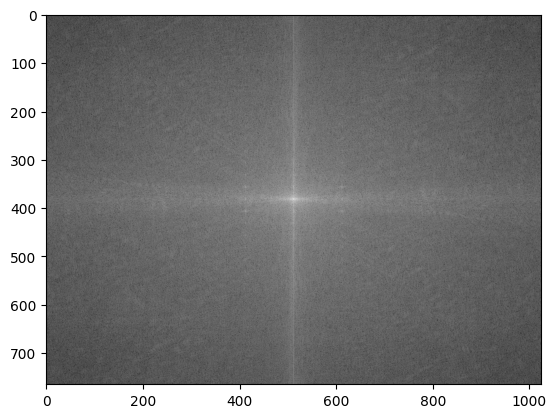

In [29]:
transformada_ima_castillo = np.fft.fft2(img_castillo)

transformada_movida_castillo = np.fft.fftshift(transformada_ima_castillo)

magnitud_transformada_movida_castillo = np.abs(transformada_movida_castillo)

magnitud_logaritmo_castillo = np.log1p(magnitud_transformada_movida_castillo)
plt.imshow(magnitud_logaritmo_castillo,cmap=cmap)

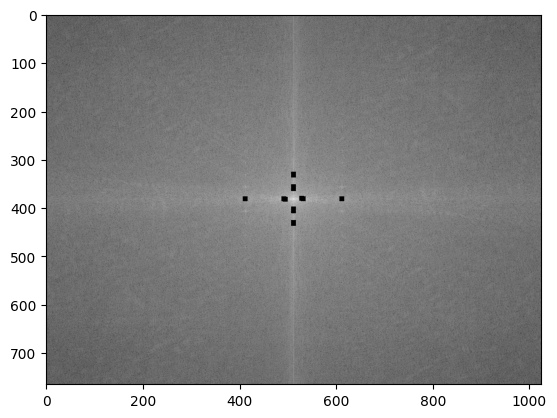

In [97]:
magnitud_log_c,copia_transformada_c = filtrar(altura_c,ancho_c,magnitud_logaritmo_castillo,transformada_movida_castillo,0.75)

plt.imshow(magnitud_log_c,cmap = cmap)

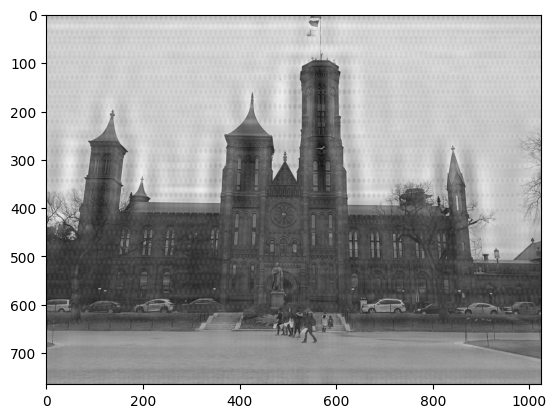

In [88]:
reorganizacion_imagen_castillo = np.fft.ifftshift(copia_transformada_c)
imagen_castillo_final = np.fft.ifft2(reorganizacion_imagen_castillo).real

plt.imshow(imagen_castillo_final,cmap = cmap)